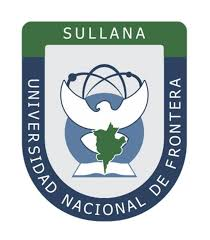
<center>
        <b>Historia del pensamiento económico</b><br> 
    <b>Sebastián Alonso Sosa Pérez</b>  <br>
<br>
    
<h1>Aplicación del modelo cournuot</h1> <br>
</center>
<i>Creado:     26-01-2021 


#   <span style="color:blue">*__Un modelo de cournot con 2 empresas__* </span>


Suponga que el mercado de un producto está dominado por dos empresas que compiten entre sí. Para este duopolio, la invesa de la función de demanda estpá dada por $ P(q)=q^{-\alpha}$ y ambas empresas tienen costos cuadráticos 
$$
C_1=\frac{1}{2}\beta_1q^2_1 \\
C_2= \frac{1}{2}\beta_2q^2_2
$$
Las ganacias de las empresas son: \
$$
\pi_1(q_1,q_2)=P(q_1+q_2)q_1-C_1(q_1) \\
\pi_2(q_1,q_2)=P(q_1+q_2)q_2-C_2(q_2)
$$
\
En un equilibrio de cournot, cada empresa maximiza sus ganacias tomando como dadas la producción de la otra empresa. así, dede cumplirse que \
$$
\frac{\partial\pi_1(q_1,q_2)}{\partial q_1}= P(q_1+q_2)+P^\prime(q_1+q_2)q_1+C^\prime_1(q_1)=0 \\
\frac{\partial\pi_2(q_1,q_2)}{\partial q_2}= P(q_1+q_2)+P^\prime(q_1+q_2)q_2+C^\prime_1(q_2)=0 
$$
\
De tal manera que los niveles de producción de equilibrio de este mercado viene dado
por la solución a este sistema de ecuaciones no lineales\
$$
f(q_1,q_2)=
\begin{bmatrix}
(q_1+q_2)^{-\alpha}-\alpha q_1(q_1+q_2)^{-\alpha-1}-\beta_1q_1 \\
(q_1+q_2)^{-\alpha}-\alpha q_2(q_1+q_2)^{-\alpha-1}-\beta_2q_2 \\
\end{bmatrix}=
\begin{bmatrix}
0 \\
0 \\
\end{bmatrix}
$$

#   <span style="color:blue">*__El método de Newton__* </span>


Para encontrar la raíz de la función definida en  (1) utilizaremos el método de Newton. \
En general, este método se aplica a la función $f: \mathbb R^n \rightarrow \mathbb R^n $ para encontrar algún valor $x_*$ tal que $f(x_*)=0$. Para ello, partimos de un valor $x_0 \in \mathbb R_n$ y formamos la recusión \
\
$$
x_{i+1}=x_i-J^{-1}(x_i)f(x_i)
$$
\
donde $J(x_i)$ corresponde el jacobiano de $f$ evaluando en $x_0$. En teoría, siguiendo esta recursión $x_i$ converge a $x^*$ siempre y cuando la función $f$ sea continuamente diferenciable y el valor inicial $x_0$ esté "suficientemente cercano" a la raíz $x^*$.

#   <span style="color:blue">*__Resolviendo el modelo con Python__* </span>

Primero, iniciamos una sesión de Python e importamos **compecon**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from compecon import NLP, gridmake

In [6]:
from compecon.demos import demo 

Para resolver este modelo computacionalmente, es necesario asignar valores a los
parámetros, por lo que fijamos los valores α = 0.625, β1 = 0.6 y β2 = 0.8

In [7]:
alpha = 0.625
beta = np.array([0.6,0.8])

Las incógnitas de nuestro problema son los niveles de producción de cada empresa,
$q_1$ y $q_2$. Definimos la función **market** que nos dice la cantidad total de producción y el
precio resultante del bien, dado los niveles de $q_1$ y $q_2$. Nótese que ambas cantidades son
pasadas a esta función en el vector $q$

Luego, definimos la función cournot, la cual retorna una tupla con dos elementos:
la función objetivo y su jacobiano, ambos evaluados en un par de cantidades contenidas
en el vector q. Para facilitar el código, nótese que la función (1) puede escribirse más
sucintamente como 
$$
f(q_1,q_2)=
\begin{bmatrix}
P+(P^\prime-c_1)q_1 \\
P+(P^\prime-c_2)q_2 \\
\end{bmatrix}=
\begin{bmatrix}
0 \\
0 \\
\end{bmatrix}
$$
y su jacobiano es 
$$
f(q_1,q_2)=
\begin{bmatrix}
2P^\prime+P^{\prime \prime} & P^\prime+P^{\prime \prime}q_1 \\
P^\prime - P^{\prime \prime}q_2 & 2P^\prime + P^{\prime \prime}q_2-c_2 \\
\end{bmatrix}
$$
Si definimos la producción total como $Q=q_1+q_2$, note además que 
$$
P^\prime = -\alpha\frac{P}{Q} \ \ y \ que \ P^{\prime \prime}= -(\alpha+1)\frac{P^\prime}{Q}
$$

In [ ]:
def market(q):
    quantity = q.sum()
    price = quantity ** (-alpha)
    return price, quantity

In [10]:
def cournot(q):
    P, Q = market(q)
    P1 = -alpha * P/Q
    P2 = (-alpha - 1) * P1 / Q
    fval = P + (P1 - beta) * q
    fjac = np.diag(2*P1 + P2*q - beta) + np.fliplr(np.diag(P1 + P2*q))
    return fval, fjac

A continuación, calculamos el equilibrio usando el método de Newton (ecuación (2))
para encontrar la raíz de la función cournot. Partimos de $q_0 =
[
0.2 0.2
]′$
como nuestro
valor inicial e iteramos hasta que la norma del cambio entre dos valores sucesivos de la
recursión sea menor que 1$0^{−10}$


In [12]:
q = np.array([0.2, 0.2])

for it in range(40):
    f, J = cournot(q)
    step = -np.linalg.solve(J, f)
    q += step
    if np.linalg.norm(step) < 1.e-10: break
        
price, quantity = market(q)
print(f'\nCompany 1 produces {q[0]:.4f} units, while' +
f' company 2 produces {q[1]:.4f} units.')
print(f'Total production is {quantity:.4f} and price is {price:.4f}')


Company 1 produces 0.8396 units, while company 2 produces 0.6888 units.
Total production is 1.5284 and price is 0.7671


Luego de solo 5 iteraciones, el método de Newton converge a la respuesta, la cual
Python muestra en pantalla.
\
\
Vemos que el programa ha encontrado el equilibrio de este mercado.
\ 
\
La librería **compecon** provee la clase **NLP** (non-linear problem), con la cual podemos
resolver el problema anterior sin necesidad de programar el algoritmo de Newton. Para
utilizarla, creamos una instancia del NLP a partir de la función **cournot**, y simplemente
ejecutamos el método **newton**, usando q0 como punto de partida.


In [13]:
q0 = np.array([0.2, 0.2])
cournot_problem = NLP(cournot)
q = cournot_problem.newton(q0)
price, quantity = market(q)
print(f'\nCompany 1 produces {q[0]:.4f} units, while' +
f' company 2 produces {q[1]:.4f} units.')
print(f'Total production is {quantity:.4f} and price is {price:.4f}')


Company 1 produces 0.8396 units, while company 2 produces 0.6888 units.
Total production is 1.5284 and price is 0.7671


El problema que hemos resuelto se ilustra en la figura 1, cuyos ejes representan los
niveles de producción de cada empresa. La línea blanca cuasi-vertical representa el nivel
que maximiza las ganancias de la empresa 1, tomando como dada la producción de
la empresa 2. De manera similar, la línea blanca cuasi-horizontal representa el nivel
que maximiza las ganancias de la empresa 2, dada la producción de la empresa 1. La
solución del problema corresponde a la intersección de estas dos líneas. Observe además
la trayectoria de convergencia (línea azul) desde el punto inicial $q_0 =
[
0.2 0.2
]′$
hasta la
solución

In [14]:
n = 100
q1 = np.linspace(0.1, 1.5, n)
q2 = np.linspace(0.1, 1.5, n)
z = np.array([cournot(q)[0] for q in gridmake(q1, q2).T]).T

In [15]:
steps_options = {'marker': 'o',
'color': (0.2, 0.2, .81),
'linewidth': 2.5,
'markersize': 9,
'markerfacecolor': 'white',
'markeredgecolor': 'red'}
contour_options = {'levels': [0.0],
'colors': 'white',
'linewidths': 2.0}

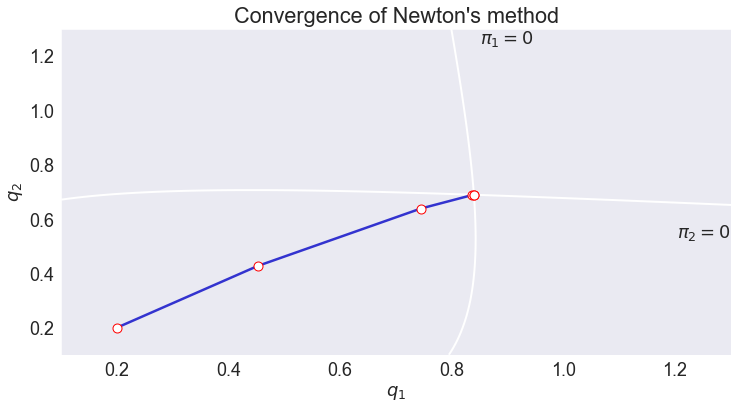

In [16]:
Q1, Q2 = np.meshgrid(q1, q2)
Z0 = np.reshape(z[0], (n,n), order='F')
Z1 = np.reshape(z[1], (n,n), order='F')
methods = ['newton', 'broyden']
cournot_problem.opts['maxit', 'maxsteps', 'all_x'] = 10, 0, True
qmin, qmax = 0.1, 1.3
x = cournot_problem.zero(method='newton')
demo.figure("Convergence of Newton's method", '$q_1$', '$q_2$',
[qmin, qmax], [qmin, qmax])
plt.contour(Q1, Q2, Z0, **contour_options)
plt.contour(Q1, Q2, Z1, **contour_options)
plt.plot(*cournot_problem.x_sequence, **steps_options)
demo.text(0.85, qmax, '$\pi_1 = 0$', 'left', 'top')
demo.text(qmax, 0.55, '$\pi_2 = 0$', 'right', 'center')